# G01 Thư viện Matplotlib: Figure và Axes, hàm `plot()`

## Mục đích

Giới thiệu về hai lớp chính trong thư viện Matplotlib là Figure và Axes. Bạn sẽ làm quen với việc thiết lập hàm `plot()` để vẽ các biểu đồ đơn giản.


## Ngữ pháp đồ họa của Python

Bản thân Python không có một thư viện đồ họa built-in nào (không giống như R). Để vẽ được biểu đồ trong Python, bạn cần sử dụng một thư viện đồ họa. Thư viện đồ họa cơ bản nhất mà hầu hết các thư viện đồ họa khác phát triển trên đó là Matplotlib. Chúng ta sẽ chủ yếu sử dụng thư viện con Pyplot của thư viện này, và thường viết tắt thư viện `matplotlib.pyplot` là `plt`.

Trước khi "tập vẽ", chúng ta sẽ xem qua ngữ pháp đồ họa của Matplotlib. Khi khởi tạo một hình mới, Matplotlib tạo một đối tượng lớp Figure. Figure giống như một khung tranh mà chúng ta căng lên để vẽ lên trên đó. Bạn có thể vẽ rất nhiều thứ lên trên đó, nhưng mỗi đối tượng vẽ lên trên Figure phải nằm trong một hệ trục tọa độ, được quy định bởi lớp Axes. Đối tượng Axes cơ bản là một hệ trục tọa độ hai chiều (có trục x và trục y). Một Figure có thể có một hoặc nhiều Axes. Mọi đối tượng đồ họa sẽ được vẽ dựa trên tọa độ của hệ trục tọa độ mà nó được quy định.

Có nhiều cách khởi tạo Figure và Axes, nhưng mình khuyến khích các bạn sử dụng hàm `plt.subplots()` để khởi tạo. Sau khi vẽ xong, chúng ta sử dụng hàm `plt.show()` để hiển thị hình vẽ đồ họa lên màn hình.

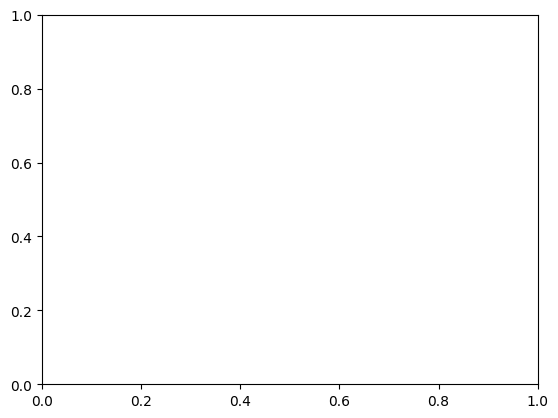

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.show()

Như bạn thấy ở phần trên, mặc định hàm `plt.subplots()` sẽ tạo ra một Figure với một hệ trục tọa độ (Axes). Bạn có thể cung cấp số hàng và số cột cho hàm này để tạo ra nhiều hệ trục tọa độ hơn.

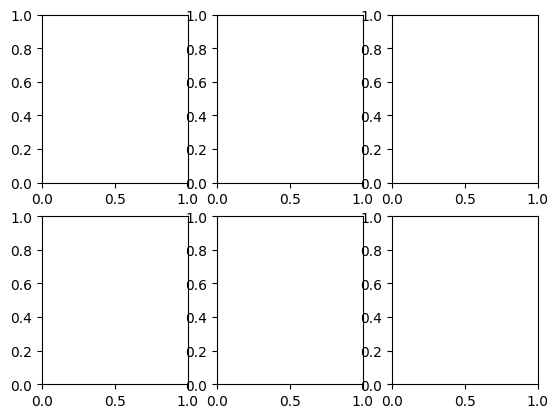

In [2]:
fig, axs = plt.subplots(2, 3)
plt.show()

Biến `axs` là một tập hợp các Axes. Trong ví dụ dưới đây mình sẽ minh họa việc này bằng cách truy cập vào từng Axes.

Các hệ trục tọa độ có vẻ hơi chờm lên nhau. Điều này sẽ được xử lí bằng một cách hiển thị (layout) tên là "tight layout".

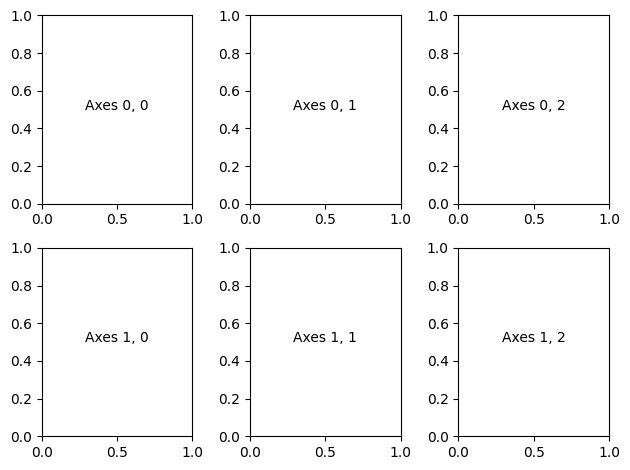

In [3]:
fig, axs = plt.subplots(2, 3, tight_layout=True)

for i in range(2):
    for j in range(3):
        ax = axs[i, j]
        ax.annotate(f"Axes {i}, {j}", (0.5, 0.5), ha="center")

plt.show()

## Hàm `plot()`

Thư viện Pyplot có rất nhiều hàm để vẽ cụ thể một số đối tượng, tuy nhiên, bạn có thể sử dụng hàm `plot()` để vẽ nói chung. Chúng ta thay đổi nội dung được vẽ bằng cách thay đổi thiết lập của hàm.

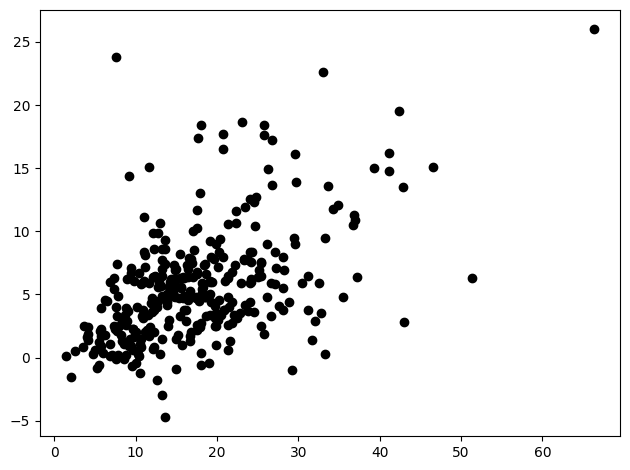

In [4]:
import pandas as pd

d = pd.read_excel("../assets/hrm.xlsx")

fig, ax = plt.subplots(tight_layout=True)
ax.plot("les_baserestp", "les_irp4s", "ok", data=d)
plt.show()

Hàm `plot()` có thể được gọi thông qua thư viện Pyplot (`plt.plot()`) hoặc thông qua đối tượng Axes (`ax.plot()`). Đối với trường hợp nêu trên, chúng ta muốn vẽ một biểu đồ scatter plot để so sánh giữa hai biến liên tục, chúng ta sẽ cung cấp thông tin về dữ liệu trên trục x và trục y cho hàm `plot()`. Có hai cách cung cấp thông tin này:

* Cung cấp số liệu trực tiếp cho trục x và y, ví dụ: `d[<tên_biến_x]`
* Cung cấp tên cột trong data frame, và cung cấp tên biến data frame cho đối số `data` (như ví dụ nêu trên)

Trước khi giải thích về cách thức định dạng biểu đồ của `plot()`, hãy cùng xem nếu không định dạng thì biểu đồ trên sẽ trông như thế nào.

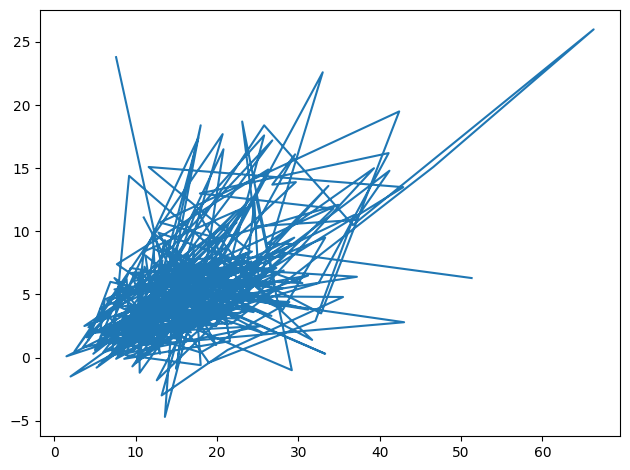

In [5]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot("les_baserestp", "les_irp4s", data=d)
plt.show()

Như bạn thấy, măc định Pyplot sẽ nối tất cả các điểm với nhau bằng đường kẻ màu xanh và không có chấm. Để thay đổi mặc định này, chúng ta sử dụng đối số `fmt`, bạn không cần gọi tên đối số này.

Có ba loại thông tin có thể cung cấp cho đối số này trong cùng một chuỗi kí tự.

* Màu sắc (color): tham khảo [ở đây](https://matplotlib.org/stable/gallery/color/named_colors.html) để biết các mã màu có thể đưa vào trong `fmt`.
* Hình dáng của chấm (marker): tham khảo [ở đây](https://matplotlib.org/stable/api/markers_api.html) để biết các hình dáng chấm có thể đưa vào trong `fmt`.
* Kiểu đường thẳng (linestyle): tham khảo [ở đây](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) để biết các kiểu đường thẳng có thể đưa vào trong `fmt`.

Thứ tự của các thông tin ở trong chuỗi kí tự không quan trọng. Nếu bạn không cung cấp thông tin nào, Pyplot sẽ sử dụng giá trị mặc định cho thông tin đó.

Ví dụ, nếu muốn vẽ biểu đồ có các chấm hình vuông màu xanh lam nối với nhau bằng đường kẻ đứt, bạn có thể sử dụng chuỗi `"bs--"`.

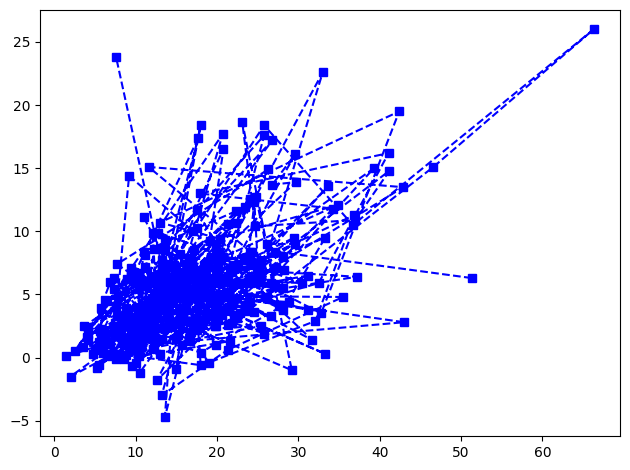

In [6]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot("les_baserestp", "les_irp4s", "bs--", data=d)
plt.show()

Nếu không muốn sử dụng đối số `fmt`, bạn có thể cung cấp thông tin cho từng đối số định dạng riêng lẻ.

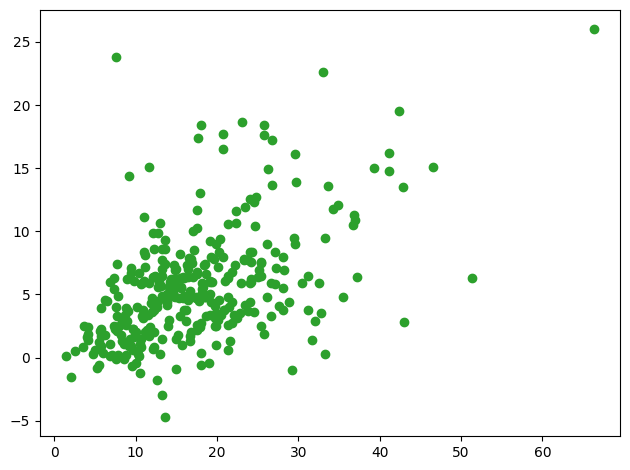

In [7]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot("les_baserestp", "les_irp4s", data=d, marker="o", ls="none", c="C2")
plt.show()

Nếu bạn chỉ cung cấp một cột cho hàm `plot()`, Pyplot sẽ coi nó là giá trị cho trục Y, và lấy số thứ tự của các bản ghi làm trục X.

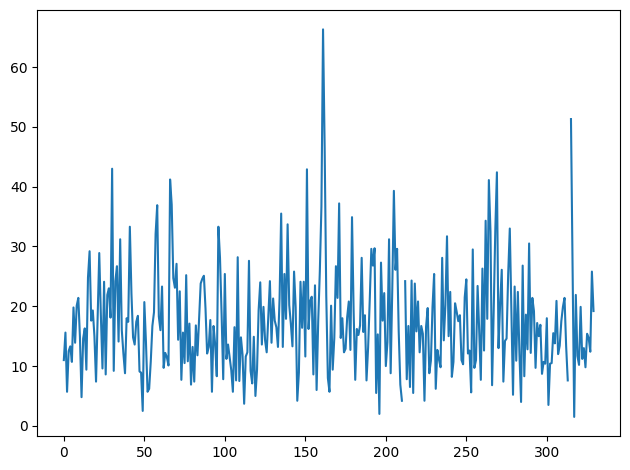

In [8]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot("les_baserestp", data=d)
plt.show()

---

[Bài trước](../05_regex/04_diemthi.ipynb) - [Danh sách bài](../README.md) - [Bài sau](./02_plot.ipynb)